In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/scores_data.csv')

In [3]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [6]:
# Remove leading/trailing spaces from column names
df.columns = [col.strip() for col in df.columns]

In [7]:
# Extract numerical score from the string format (e.g., '6 / 7' -> 6)
df['Score_num'] = df['Score'].str.split('/').str[0].astype(int)

In [9]:
df.head()


,Batch,User_ID,Score,Score_num
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


In [11]:
# Descriptive Statistics
stats = df.groupby('Batch')['Score_num'].describe()
print("Batch Statistics:")
print(stats)

Batch Statistics:
            count      mean       std  min  25%  50%   75%  max
Batch                                                          
AI_ELITE_4   48.0  3.791667  1.443376  0.0  3.0  4.0  4.25  7.0
AI_ELITE_6   48.0  4.229167  1.640441  0.0  3.0  4.0  5.00  7.0
AI_ELITE_7   53.0  5.056604  1.446682  2.0  4.0  5.0  6.00  7.0


AI_ELITE_7 is the top-performing batch, maintaining the highest average score (~5.06) and a significantly higher performance floor (minimum score of 2) compared to the other batches.

In [13]:
# Students per batch
students_per_batch = df['Batch'].value_counts()
print("\nStudents per Batch:")
print(students_per_batch)


Students per Batch:
Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64


AI_ELITE_7 is the most populated batch with 53 students, while AI_ELITE_4 and AI_ELITE_6 maintain an identical and slightly smaller enrollment of 48 students each.


In [15]:
df.groupby("Batch")["Score_num"].median()

,Score_num
Batch,
AI_ELITE_4,4.0
AI_ELITE_6,4.0
AI_ELITE_7,5.0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

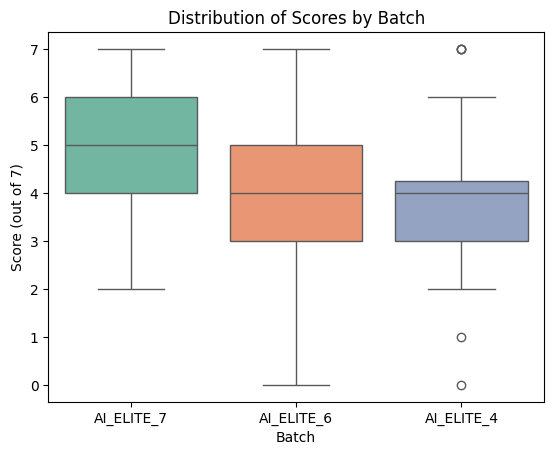

In [22]:
sns.boxplot(x='Batch',y='Score_num',hue='Batch',data=df,palette='Set2',legend=False)

plt.title('Distribution of Scores by Batch')
plt.ylabel('Score (out of 7)')
plt.show();

AI_ELITE_7 shows consistently higher scores with fewer weak performers, AI_ELITE_6 has the widest spread indicating mixed ability, and AI_ELITE_4 clusters lower with visible low-score outliers.

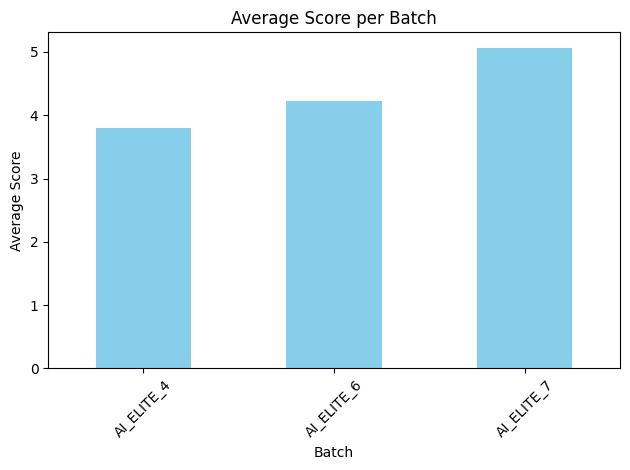

In [23]:
avg_scores = df.groupby('Batch')['Score_num'].mean().sort_values()
avg_scores.plot(kind='bar', color='skyblue')
plt.title('Average Score per Batch')
plt.ylabel('Average Score')
plt.xticks(rotation=45)

plt.tight_layout()

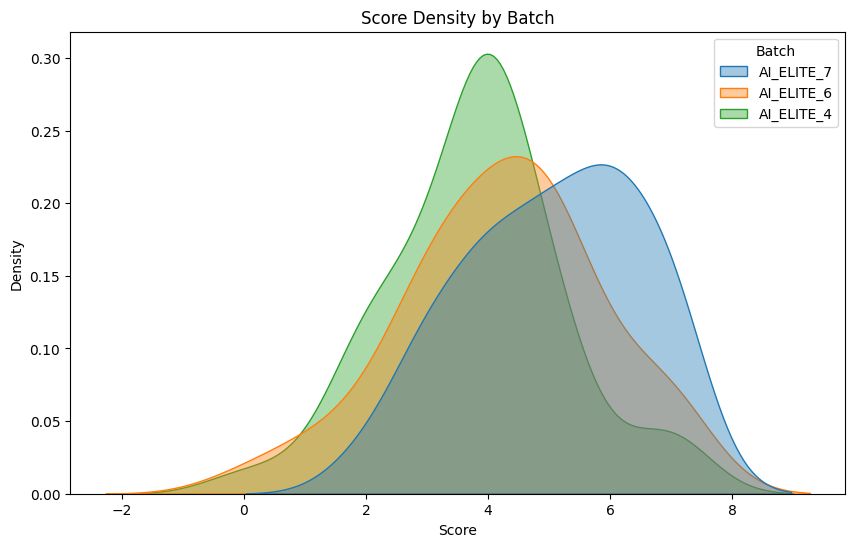

In [28]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df,
    x='Score_num',
    hue='Batch',
    fill=True,
    common_norm=False,
    alpha=0.4
)

plt.title('Score Density by Batch')
plt.xlabel('Score')
plt.show()

The density curves show a clear rightward shift for AI_ELITE_7 indicating stronger overall performance, a broad spread for AI_ELITE_6 reflecting mixed ability, and a lower, left-peaked distribution for AI_ELITE_4 highlighting weaker scores.


In [34]:
threshold = 5
high_performers = df[df['Score_num'] >= threshold]

# 3. Calculate counts per batch
high_performer_counts = high_performers.groupby('Batch').size().reset_index(name='High_Performer_Count')
total_counts = df.groupby('Batch').size().reset_index(name='Total_Students')

# 4. Merge data to calculate the percentage of high performers
summary = pd.merge(total_counts, high_performer_counts, on='Batch', how='left').fillna(0)
summary['Percentage'] = (summary['High_Performer_Count'] / summary['Total_Students']) * 100

print("High Performer Analysis (Scores >= 5):")
print(summary)

High Performer Analysis (Scores >= 5):
        Batch  Total_Students  High_Performer_Count  Percentage
0  AI_ELITE_4              48                    12   25.000000
1  AI_ELITE_6              48                    22   45.833333
2  AI_ELITE_7              53                    34   64.150943


AI_ELITE_7 shows a clear performance advantage, with nearly 64% of its students achieving high scores a rate that is more than double that of AI_ELITE_4.

In [35]:
threshold = 4
# Filter for students scoring below the threshold (0, 1, 2, 3)
low_performers = df[df['Score_num'] < threshold]

low_performer_counts = low_performers.groupby('Batch').size().reset_index(name='Low_Performer_Count')
total_counts = df.groupby('Batch').size().reset_index(name='Total_Students')

summary = pd.merge(total_counts, low_performer_counts, on='Batch', how='left').fillna(0)
summary['Percentage'] = (summary['Low_Performer_Count'] / summary['Total_Students']) * 100

print("Low Performer Analysis (Scores < 4):")
print(summary)

Low Performer Analysis (Scores < 4):
        Batch  Total_Students  Low_Performer_Count  Percentage
0  AI_ELITE_4              48                   17   35.416667
1  AI_ELITE_6              48                   15   31.250000
2  AI_ELITE_7              53                    9   16.981132


AI_ELITE_7 demonstrates the highest student proficiency, with only 17% of students scoring below 4, effectively halving the low-performance rates observed in both AI_ELITE_4 and AI_ELITE_6.

# **Concluding Summary**



*   Overall Leader: AI_ELITE_7 is the top-performing batch, achieving the highest average score (5.06/7) and maintaining the largest enrollment with 53 students.

*  High Success Rate: AI_ELITE_7 has a dominant high-performer rate (64% scoring 5 or above), which is more than double that of AI_ELITE_4 (25%).

*  Minimal Risk: AI_ELITE_7 successfully raised the performance floor; only 17% of its students scored below 4, compared to roughly 35% in AI_ELITE_4.


*   Talent Spread: While AI_ELITE_7 is the most consistent, AI_ELITE_6 shows the widest spread of scores, indicating a highly mixed range of student abilities.














The data reveals a progressive improvement across the batches. AI_ELITE_7 successfully maximizes student potential by doubling the high-performer rate of AI_ELITE_4 and halving the low-performer rate, establishing it as the most academically successful group.